Part 1 – Object Oriented programming

In [2]:
# Base class
class GeneralNeuron:
    def __init__(self, firing_rate):
        self.firing_rate = firing_rate  # Basic attribute for all neurons

    def activate(self, stimulus_strength):
        """Calculate firing rate based on stimulus strength"""
        pass  # Placeholder for base functionality


# Intermediate class for sensory neurons
class SensoryNeuron(GeneralNeuron):
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate)
        self.receptor_type = receptor_type  # Type of stimulus the neuron detects

    def sense_stimulus(self, stimulus):
        """Process specific stimulus and activate the neuron"""
        pass  # Placeholder for sensory neuron functionality


# Leaf classes for specific sensory neurons
class Photoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="light")  # Fixed receptor type

    def detect_light(self, light_intensity):
        """Unique behavior for light detection"""
        pass  # Placeholder for light-specific behavior


class Mechanoreceptor(SensoryNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type="pressure")  # Fixed receptor type

    def detect_pressure(self, pressure_level):
        """Unique behavior for pressure detection"""
        pass  # Placeholder for pressure-specific behavior


# Intermediate class for motor neurons
class MotorNeuron(GeneralNeuron):
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate)
        self.target_muscle = target_muscle  # Muscle controlled by the neuron

    def control_muscle(self):
        """Trigger response in target muscle"""
        pass  # Placeholder for motor neuron functionality


# Leaf classes for specific motor neurons
class AlphaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="skeletal muscle")  # Fixed target

    def control_skeletal_muscle(self):
        """Behavior specific to skeletal muscles"""
        pass  # Placeholder for skeletal muscle behavior


class GammaMotorNeuron(MotorNeuron):
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle="muscle spindle")  # Fixed target

    def control_muscle_spindle(self):
        """Behavior specific to muscle spindles"""
        pass  # Placeholder for spindle-specific behavior


Part 2 – NumPy, Pandas, MatPlotLib:

Q1

In [5]:
pip install numpy matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 175.5 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 204.3 kB/s eta 0:00:00a 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 155.2 kB/s eta 0:00:0000:0200:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 114.3 kB/s eta 0:00:00a 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 113.3 kB/s eta 0:00:00a 0:00:03
Note: you may need to restart the kernel to use updated packages.


In [11]:
import numpy as np
import matplotlib.pyplot as plt

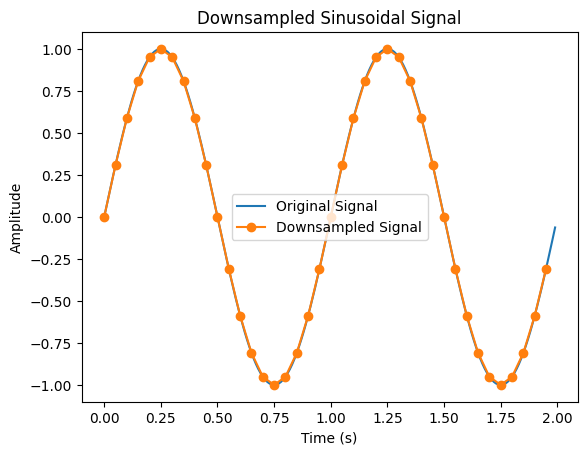

The downsampled signal is 80.00% smaller than the original signal.


In [15]:

def downsample_signal(signal, sampling_interval=5):
    """Downsample a sinusoidal signal while preserving all maximum and minimum points."""
    # Find indices of maxima and minima
    maxima = np.argwhere((signal[1:-1] > signal[:-2]) & (signal[1:-1] > signal[2:])).flatten() + 1
    minima = np.argwhere((signal[1:-1] < signal[:-2]) & (signal[1:-1] < signal[2:])).flatten() + 1

    # Combine maxima, minima, and regularly spaced points
    critical_points = np.unique(np.sort(np.concatenate([maxima, minima, np.arange(0, len(signal), sampling_interval)])))

    # Return the downsampled signal
    return signal[critical_points]

# Create a sinusoidal signal with lower frequency (1Hz) to make it look wider (more parabolic)
t = np.arange(0, 2, 0.01)  # Time vector
original_signal = np.sin(2 * np.pi * 1 * t)  # Sinusoidal signal with 1 Hz frequency

# Downsample the signal
downsampled_signal = downsample_signal(original_signal)

# Calculate the size difference between original and downsampled signal
original_size = len(original_signal)
downsampled_size = len(downsampled_signal)
size_difference = original_size - downsampled_size

# Calculate the percentage size difference
percentage_difference = (size_difference / original_size) * 100

# Plot original and downsampled signals
plt.figure()
plt.plot(t, original_signal, label='Original Signal')
plt.plot(t[::5], downsampled_signal, 'o-', label='Downsampled Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Downsampled Sinusoidal Signal')
plt.legend()
plt.show()

# Print the percentage difference
print(f"The downsampled signal is {percentage_difference:.2f}% smaller than the original signal.")


Q2

Plot the price of all the laptops

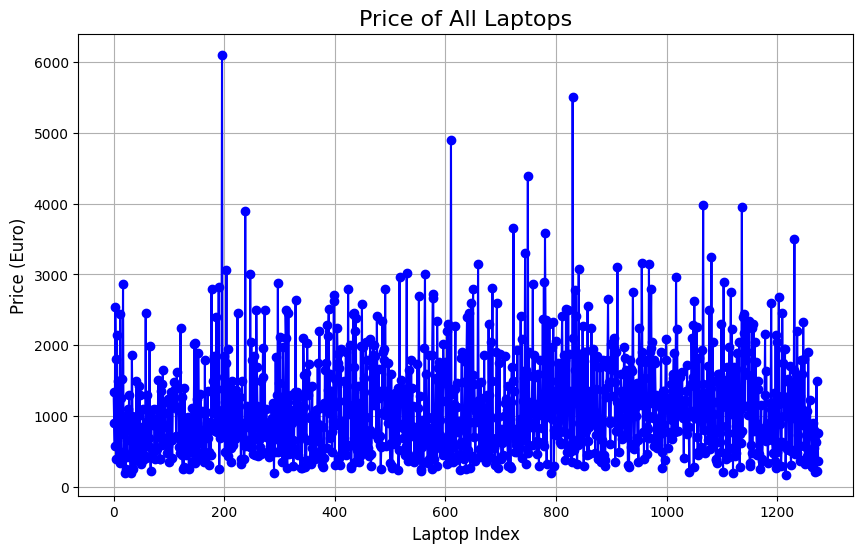

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df= pd.read_csv('laptop_price - dataset.csv')

# 1. Plot the price of all the laptops
plt.figure(figsize=(10, 6))
plt.plot(df['Price (Euro)'], marker='o', linestyle='-', color='b')
plt.title('Price of All Laptops', fontsize=16)
plt.xlabel('Laptop Index', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True)
plt.show()

Which company has on average the most expensive laptop? What is the average
laptop price for each company?

In [20]:
# 2. Calculate the average laptop price for each company and find the company with the most expensive laptops
avg_price_by_company = df.groupby('Company')['Price (Euro)'].mean()
most_expensive_company = avg_price_by_company.idxmax()
most_expensive_price = avg_price_by_company.max()

print("Average Price by Company:\n", avg_price_by_company)
print(f"Most expensive company: {most_expensive_company} with an average price of {most_expensive_price} Euro")

Average Price by Company:
 Company
Acer          633.464455
Apple        1564.198571
Asus         1123.829737
Chuwi         314.296667
Dell         1199.225120
Fujitsu       729.000000
Google       1677.666667
HP           1080.314664
Huawei       1424.000000
LG           2099.000000
Lenovo       1093.862215
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price (Euro), dtype: float64
Most expensive company: Razer with an average price of 3346.1428571428573 Euro


Find the different types of Operating systems present in the data

In [21]:
# 3. Find the different types of Operating systems (OpSys) and standardize them
df['OpSys'] = df['OpSys'].str.lower().str.strip()  # Convert to lowercase and remove leading/trailing spaces
df['OpSys'] = df['OpSys'].replace({'mac os x': 'macos', 'windows 10 s': 'windows 10'})  # Standardize system names

# Find the unique operating systems after standardization
unique_op_sys = df['OpSys'].unique()
print("Unique Operating Systems:", unique_op_sys)

Unique Operating Systems: ['macos' 'no os' 'windows 10' 'linux' 'android' 'chrome os' 'windows 7']


Plot for each of the operating system types the distribution of the prices

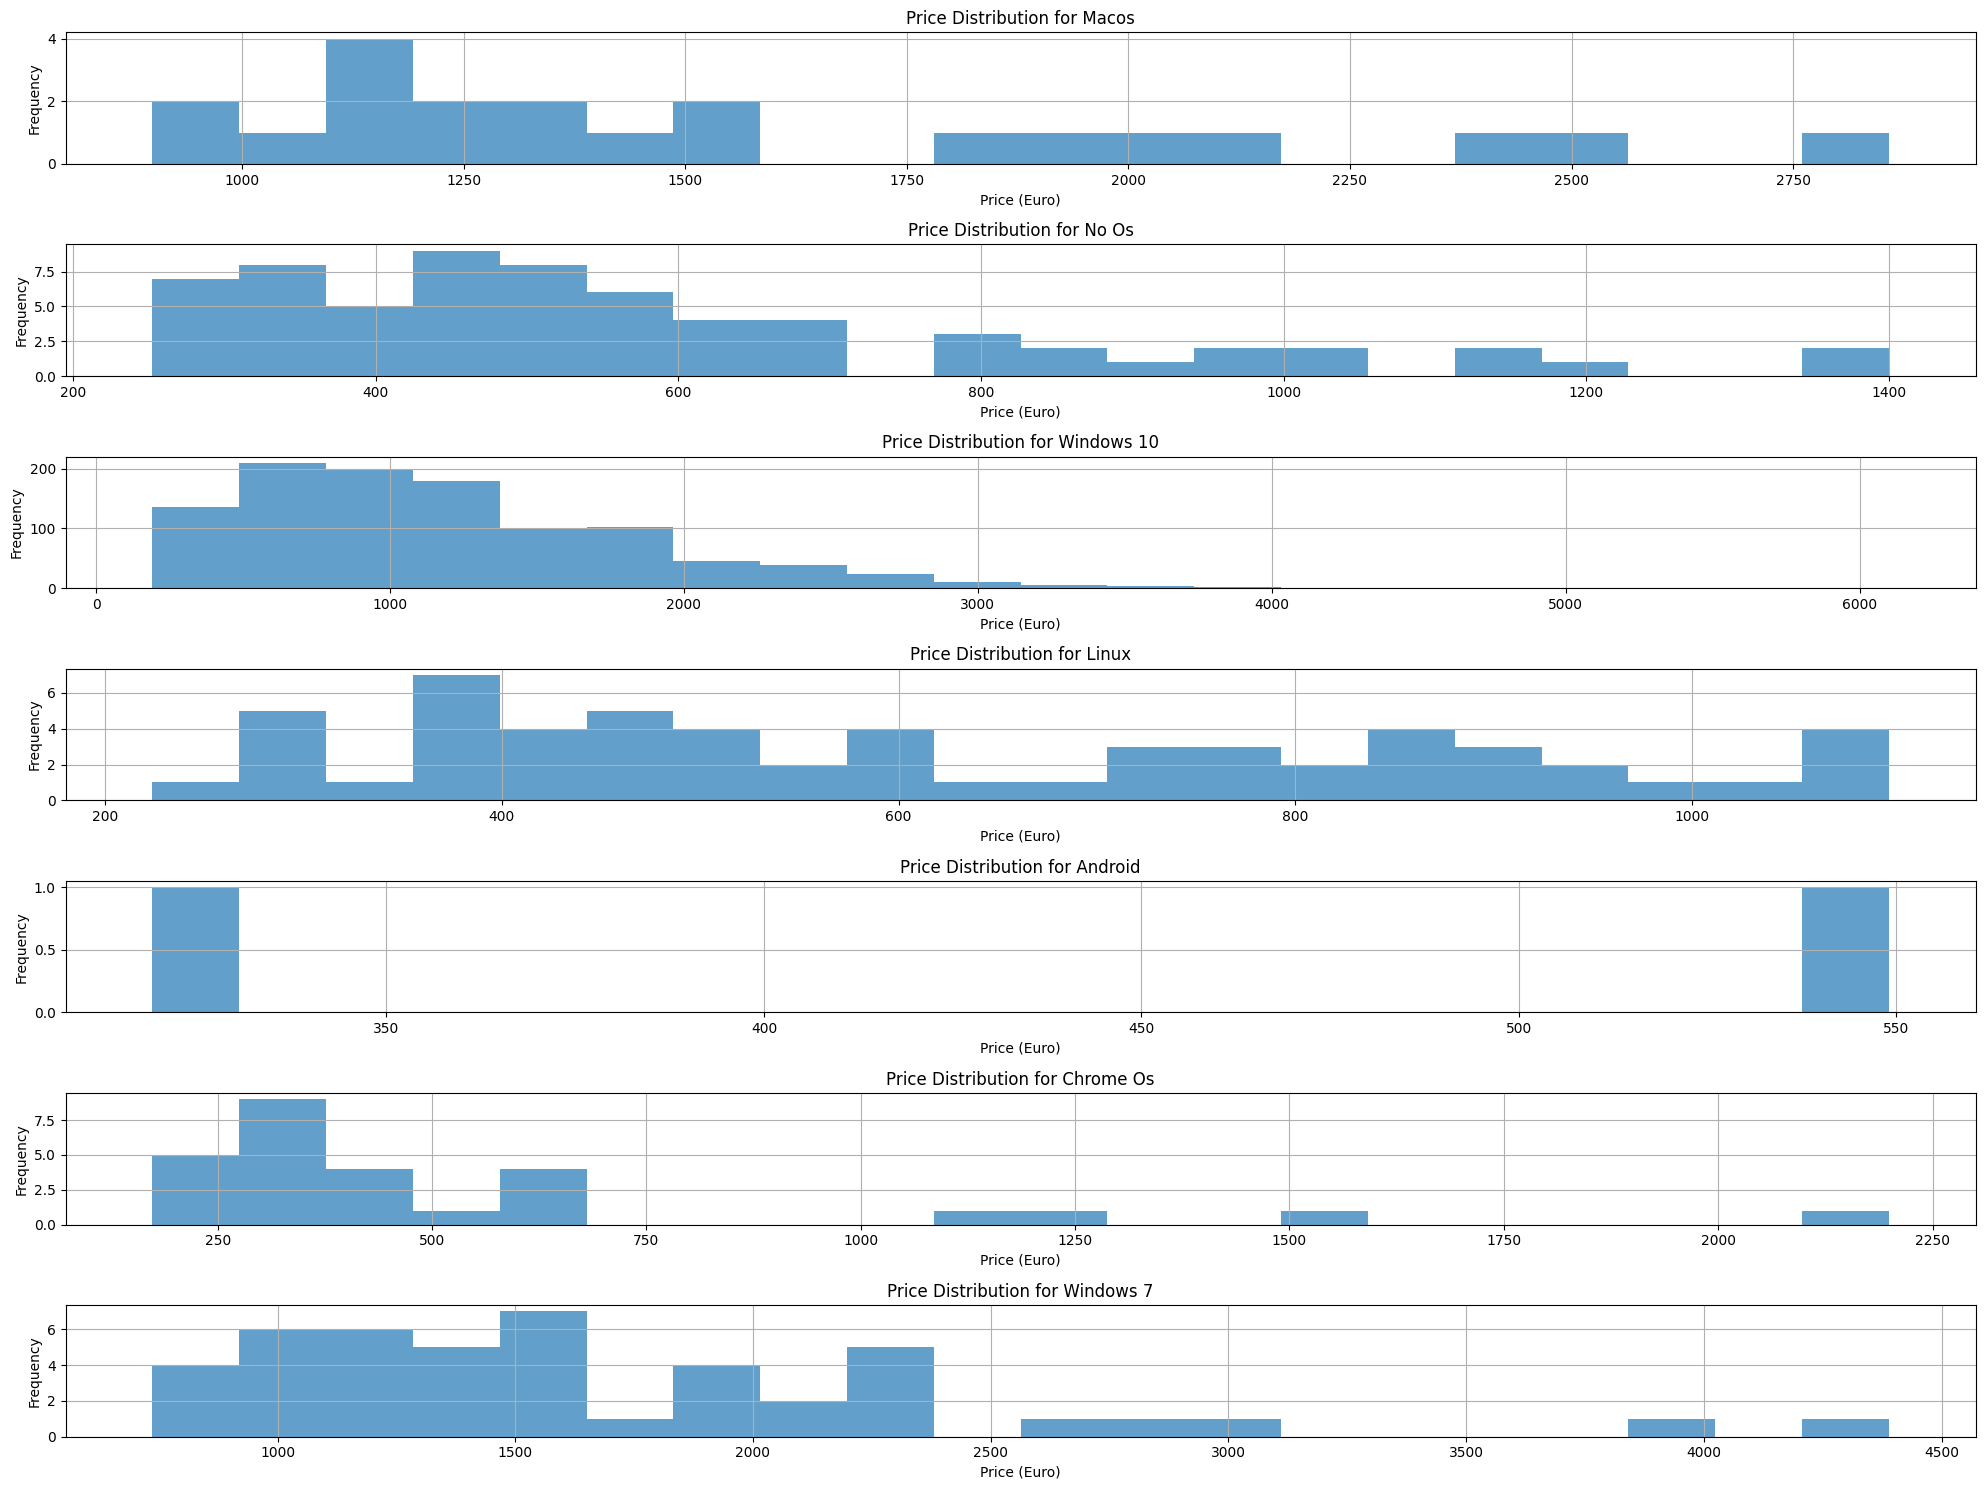

In [23]:
# 4. Plot the price distribution for each operating system
plt.figure(figsize=(20, 15))
for i, os in enumerate(unique_op_sys):
    plt.subplot(len(unique_op_sys), 1, i+1)
    subset = df[df['OpSys'] == os]
    plt.hist(subset['Price (Euro)'], bins=20, alpha=0.7)
    plt.title(f'Price Distribution for {os.title()}', fontsize=12)
    plt.xlabel('Price (Euro)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(True)

plt.tight_layout()
plt.show()

What is the relationship between RAM and computer price

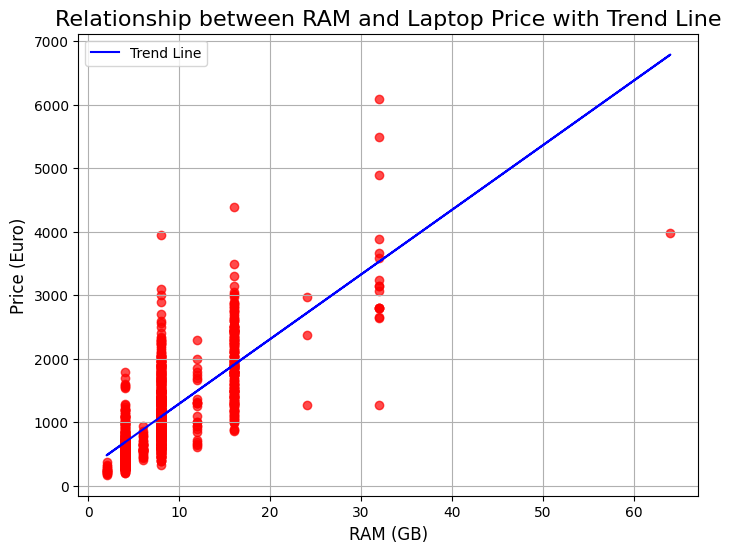

In [26]:
import numpy as np

# 5. Investigate the relationship between RAM and computer price with a trend line
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(df['RAM (GB)'], df['Price (Euro)'], alpha=0.7, color='r')

# Fit a line to the data (linear regression)
slope, intercept = np.polyfit(df['RAM (GB)'], df['Price (Euro)'], 1)
plt.plot(df['RAM (GB)'], slope * df['RAM (GB)'] + intercept, color='b', label='Trend Line')

# Add labels and title
plt.title('Relationship between RAM and Laptop Price with Trend Line', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True)
plt.legend()

plt.show()


Create a new column for the dataframe called "Storage type" that extracts the
storage type from the column "Memory".

In [27]:
# 6. Create a new column for "Storage type" extracted from the "Memory" column
df['Storage type'] = df['Memory'].apply(lambda x: x.split(' ')[-1])  # Extract the last word (e.g., 'SSD' or 'Flash Storage')

# Display the updated dataframe with the new column
print(df[['Memory', 'Storage type']].head())

                Memory Storage type
0            128GB SSD          SSD
1  128GB Flash Storage      Storage
2            256GB SSD          SSD
3            512GB SSD          SSD
4            256GB SSD          SSD


Bonus question 

<Figure size 1000x600 with 0 Axes>

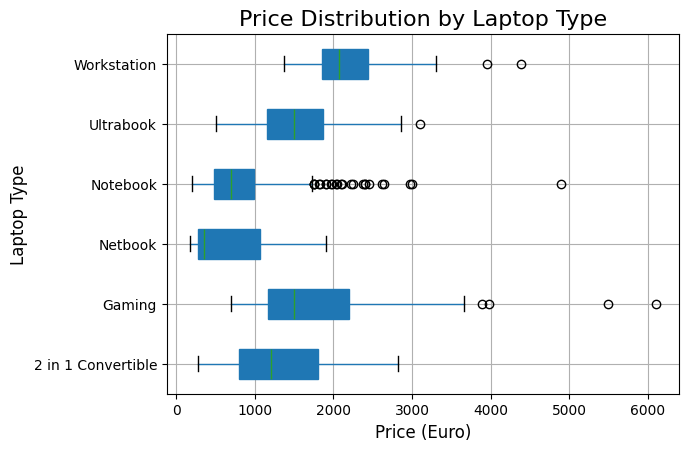

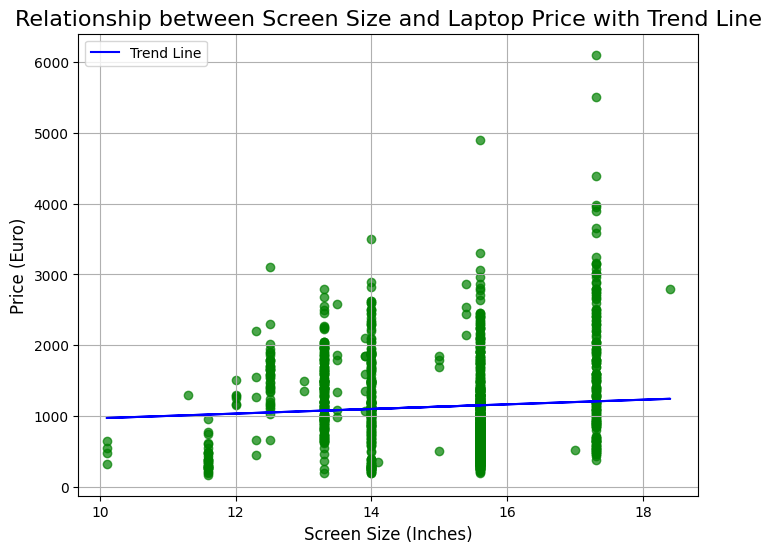

In [28]:
# 1. Price distribution across different laptop types
plt.figure(figsize=(10, 6))
df.boxplot(column='Price (Euro)', by='TypeName', vert=False, patch_artist=True)
plt.title('Price Distribution by Laptop Type', fontsize=16)
plt.suptitle('')  # Suppress the default subtitle
plt.xlabel('Price (Euro)', fontsize=12)
plt.ylabel('Laptop Type', fontsize=12)
plt.grid(True)
plt.show()

# 2. Relationship between screen size and laptop price
plt.figure(figsize=(8, 6))

# Scatter plot
plt.scatter(df['Inches'], df['Price (Euro)'], alpha=0.7, color='g')

# Fit a line to the data (linear regression)
slope, intercept = np.polyfit(df['Inches'], df['Price (Euro)'], 1)
plt.plot(df['Inches'], slope * df['Inches'] + intercept, color='b', label='Trend Line')

# Add labels and title
plt.title('Relationship between Screen Size and Laptop Price with Trend Line', fontsize=16)
plt.xlabel('Screen Size (Inches)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True)
plt.legend()

plt.show()


The first graph shows that Ultrabooks are usually more expensive, especially brands like Apple and Razer. Notebooks have a bigger range of prices, with both cheap and expensive models. The second graph shows that laptops with larger screens tend to cost more, but some small-screen models are still expensive, which means other factors like the brand and processor affect the price too.